# Bengaluru-Housing-Price-Prediction
The Prices are in lakhs (100k=1 lakhs).

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
#s pd.set_option('display.max_row', 100)
# pd.set_option('display.max_col', 100)
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import numpy as np

In [165]:
df=pd.read_csv('Data/Bengaluru_House_Data.csv')

In [166]:
print(df.shape)

(13320, 9)


In [167]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Data types:
* Categorical:area_type,availabilty,location,size,society
* continous: total_sqft,bath,balcony,price(to predict)

In [169]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### **Features with missing values :location,size,society(a lot),bath,balcony**

 # Data cleaning
 

## total_sqft
* doesn't have null value


In [170]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'], dtype=object)

* Finding vlaues that can be and can't be converted to float.

In [171]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [172]:
df[~df['total_sqft'].apply(is_float)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


* There are some values in range for eg.(4323-4344) , converting them to float

In [173]:
def convert_float(x):
    s=x.split('-')
    if len(s)==2:
        return (float(s[0
                       ])+float(s[1]))/2
    try:
        return float(x)
    except:
        return x    

In [174]:
df['total_sqft']=df['total_sqft'].apply(convert_float)

* Again finding and cconveting the values that are not float.For eg. (1223Sq. Meters , 2432Sq. yards etc.)

In [175]:
def unique_sqft(x):
    if(type(x)!=float):
        return True
    else:
        return False
        

In [176]:
df[df['total_sqft'].apply(unique_sqft)]['total_sqft']

410       34.46Sq. Meter
648            4125Perch
775        1000Sq. Meter
872        1100Sq. Yards
1019           5.31Acres
1086             30Acres
1400        716Sq. Meter
1712       1500Sq. Meter
1743     142.61Sq. Meter
1821       1574Sq. Yards
2310     361.33Sq. Yards
2881        117Sq. Yards
3228       3040Sq. Meter
3285        500Sq. Yards
4113        167Sq. Meter
4293        315Sq. Yards
5453              3Cents
5537     188.89Sq. Yards
5631        204Sq. Meter
5668         45Sq. Yards
5708      133.3Sq. Yards
5976      78.03Sq. Meter
6268        122Sq. Yards
6303      84.53Sq. Meter
6333           2.09Acres
6552            24Guntha
6592        697Sq. Meter
6953     142.61Sq. Meter
7001           1500Cents
7248        132Sq. Yards
7334              2Acres
7520       1100Sq. Meter
7607             15Acres
7726           1.26Acres
8273     151.11Sq. Yards
9423            1Grounds
9519       2940Sq. Yards
9734      45.06Sq. Meter
10488          1.25Acres
10491     86.72Sq. Meter


In [177]:
def measurement_convert(x):
        if(type(x)==float):
            return x
        else:
            try:
                s=x.split('Sq.')
                if s[1].strip()=='Meter':
                    return (float(s[0])* 10.76391)
                elif s[1].strip()=='Yards':
                    return (float(s[0])*9)
            except:
                return None

In [178]:
df['total_sqft']=df['total_sqft'].apply(measurement_convert)

In [179]:
df.loc[872]#So it worked , you can check the value  by converting the total_sqft at index 872

area_type       Super built-up  Area
availability           Ready To Move
location           Singapura Village
size                           2 BHK
society                          NaN
total_sqft                      9900
bath                               2
balcony                          NaN
price                             45
Name: 872, dtype: object

_Still there are some measurements that we have not converted , but they are insignificant so we will say goodye(**drop**) to them._ (They are 14 in count.)

In [180]:
df['total_sqft'].isnull().sum()

14

In [181]:
df=df.dropna(subset=['total_sqft'])

In [182]:
df2=df.copy()

In [183]:
print(df.shape,df2.shape)#dropped 14 values ....horray

(13306, 9) (13306, 9)


## Size (cleaning size column)

In [184]:
df2['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13306, dtype: object

In [185]:
def bhk_convert(x):  
    try:
        b=x.split(" ")
        return int(b[0])
    except:
        return None    

In [186]:
df2.dropna(subset=['size'],inplace=True)

In [187]:
df2['bhk']=df2['size'].apply(bhk_convert)

In [188]:
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2


In [189]:
df2.shape

(13290, 10)

In [190]:
df2.drop('size',axis=1,inplace=True)

In [191]:
df3=df2.copy()

In [192]:
df3.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2


# Feature Engeneering 
Creating new feature price per_sqft, as it is significant for a property.

In [193]:
df4=df3.copy()

In [194]:
df4['price_per_sq_foot'] = (df4['price']*100000/df4['total_sqft'])

In [195]:
df4.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sq_foot
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2,4250.000000


In [196]:
df5=df4.copy()

## Location column

In [197]:
len(df5.location.unique())

1300

There are a lot of different locations, we found no of data points for each location and consinder only those location having data points grater than _n_ data points (here say 10) and rename the location less than _n_ as 'others'.

In [198]:
df5.location =df5.location.apply(lambda x : str(x).strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              540
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             237
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1289, dtype: int64

In [199]:
print("location with less than 10 data points: {}".format(len(location_stats[location_stats<=10])))
print("location with more than 10 data points: {}".format(len(location_stats[location_stats>10])))

location with less than 10 data points: 1049
location with more than 10 data points: 240


Now , change all the location with data points less than or equal to 10 to 'other'

In [200]:
location_lessthan_10=location_stats[location_stats <=10]

In [201]:
df5.location=df5.location.apply(lambda x: "other" if x in location_lessthan_10 else x)

In [202]:
df6=df5.copy()

## Outlier removal

## feature "bhk"

In [203]:
df6.shape

(13290, 10)

In [204]:
df6[df6.total_sqft/df6.bhk <300]

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sq_foot
9,Plot Area,Ready To Move,other,NaN,1020.0,6.0,NaN,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,NaN,600.0,9.0,NaN,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,NaN,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,NaN,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,NaN,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,other,NaN,1400.0,7.0,NaN,218.0,7,15571.428571
13279,Plot Area,Ready To Move,other,NaN,1200.0,5.0,NaN,130.0,6,10833.333333
13281,Plot Area,Ready To Move,Margondanahalli,NaN,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Plot Area,Ready To Move,Vidyaranyapura,NaN,774.0,5.0,3.0,70.0,5,9043.927649


In [205]:
df6=df6[~(df6.total_sqft/df6.bhk<300)]

In [206]:
df7=df6.copy()

## feature "total_sqft"

In [207]:
df7.price_per_sq_foot.describe()

count     12543.000000
mean       6303.886961
std        4159.605936
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6920.887930
max      176470.588235
Name: price_per_sq_foot, dtype: float64

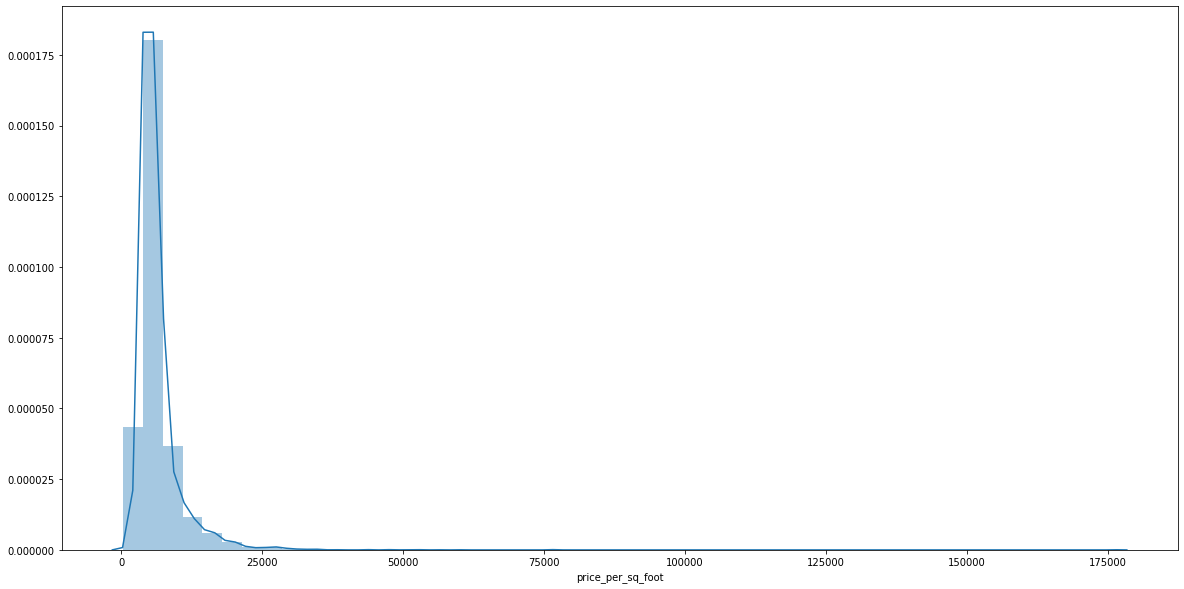

In [208]:
sns.distplot(df7['price_per_sq_foot'])

In [209]:
def remove_pps_outlier(df):
    out_df=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sq_foot)
        st=np.std(subdf.price_per_sq_foot)
        reduced_df=subdf[(subdf.price_per_sq_foot>(m-st)) & (subdf.price_per_sq_foot<=(m+st))]
        out_df = pd.concat([out_df,reduced_df],ignore_index=True)
    return out_df        

In [210]:
df7.shape

(12543, 10)

In [211]:
df7=remove_pps_outlier(df7)

In [212]:
df7.shape

(10312, 10)